In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
sess = tf.InteractiveSession()

In [4]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [5]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [6]:
sess.run(tf.global_variables_initializer())

In [7]:
y = tf.matmul(x,W) + b
ys = tf.nn.softmax(y)

In [8]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [9]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [10]:
for _ in range(1000):
  batch = mnist.train.next_batch(100)
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})

In [11]:
tf.argmax(y,1).eval(feed_dict={x: mnist.train.images, y_: mnist.train.labels})

array([7, 4, 8, ..., 7, 1, 7])

In [12]:
ys.eval(feed_dict={x: mnist.train.images, y_: mnist.train.labels}).shape

(55000, 10)

In [45]:
num_to_turn_into = 9
var_grad = tf.gradients(ys[:,num_to_turn_into], x)[0]
grad_eval = sess.run(var_grad, feed_dict={x: mnist.train.images, y_: mnist.train.labels})
grad_eval.shape

(55000, 784)

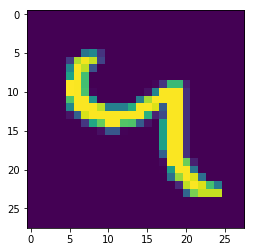

In [48]:
plt.imshow(mnist.train.images[9].reshape([28,28]))

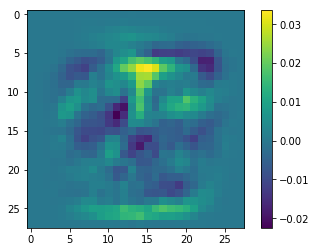

In [49]:
plt.imshow(grad_eval[9,:].reshape([28,28]))
plt.colorbar()